In [87]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv("./Datasets/datasets_13720_18513_insurance.csv",skipinitialspace=True, engine="python")
sex = {'male': 1,'female': 0}
smoker = {'yes': 1,'no': 0}
region = {'northwest': 0,'southwest': 1,'northeast':3,'southeast':4}

data.sex = [sex[item] for item in data.sex]
data.smoker = [smoker[item] for item in data.smoker]
data.region = [region[item] for item in data.region]
data.age = (data['age'] -data["age"].mean())/data['age'].std()
data['bmi'] = (data['bmi'] -data["bmi"].mean())/data['bmi'].std()

print(data)

x = dataset.iloc[:,0:6].values
y = dataset.iloc[:,6].values



           age  sex       bmi  children  smoker  region      charges
0    -1.438227    0 -0.453151         0       1       1  16884.92400
1    -1.509401    1  0.509431         1       0       4   1725.55230
2    -0.797655    1  0.383164         3       0       4   4449.46200
3    -0.441782    1 -1.305043         0       0       0  21984.47061
4    -0.512957    1 -0.292447         0       0       0   3866.85520
...        ...  ...       ...       ...     ...     ...          ...
1333  0.768185    1  0.050278         3       0       0  10600.54830
1334 -1.509401    0  0.206062         0       0       3   2205.98080
1335 -1.509401    0  1.014499         0       0       4   1629.83350
1336 -1.295877    0 -0.797515         0       0       1   2007.94500
1337  1.551106    0 -0.261290         0       1       0  29141.36030

[1338 rows x 7 columns]


In [313]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [326]:

def get_model():
    model = Sequential()
    model.add(Dense(16,input_shape=(6,),activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))

    return model





In [334]:
model = get_model()
optimzer = Adam(lr=0.005)
model.compile(optimizer=optimzer,loss="mse", metrics=['mae'])


In [335]:
history = model.fit(X_train,y_train,epochs=900,validation_split=0.2,verbose=0)

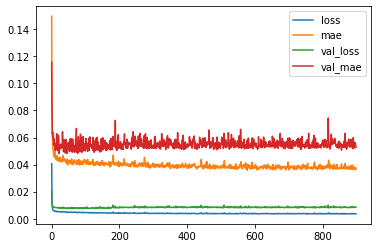

In [336]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [337]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
print(model.evaluate(X_test,y_test))
predictions = model.predict(X_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print('VarScore:',explained_variance_score(y_test,predictions))

268/268 [==============================] - 0s 169us/sample - loss: 0.0054 - mae: 0.0427
[0.005388088118191113, 0.04270693]
0.042706932306287616
0.07340359675014699
VarScore: 0.8276993003333741


<h2>Best so far<f2>
0.031706932306287616
0.07240359675014699
VarScore: 0.8376993003333741